In [1]:
%matplotlib inline

# Data Management
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [19]:
# Read in the data
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
data.shape

(1599, 12)

In [21]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
data.duplicated().sum()

240

In [25]:
data[data.duplicated(keep= False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
39,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
64,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5


In [28]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [18]:
data.groupby(by='quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [4]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


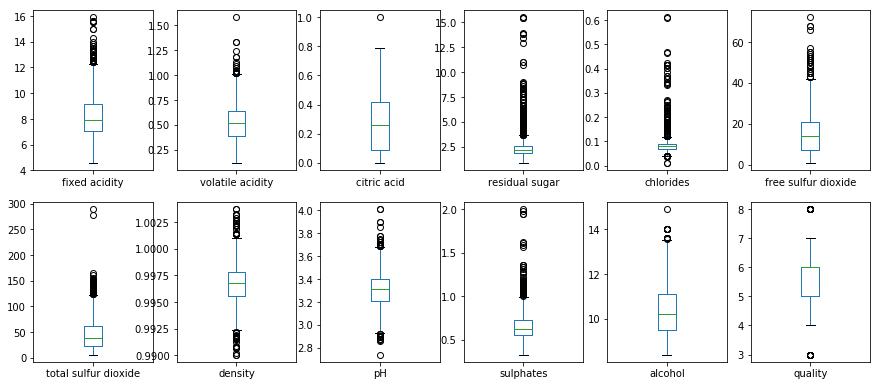

In [16]:
data.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=[3,6], figsize=[15,10]);

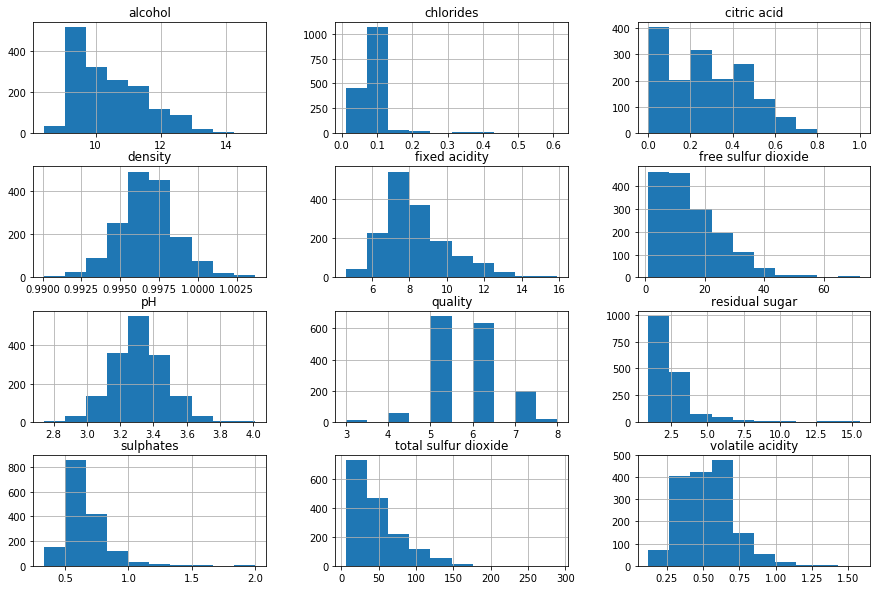

In [31]:
data.hist(figsize=[15,10]);

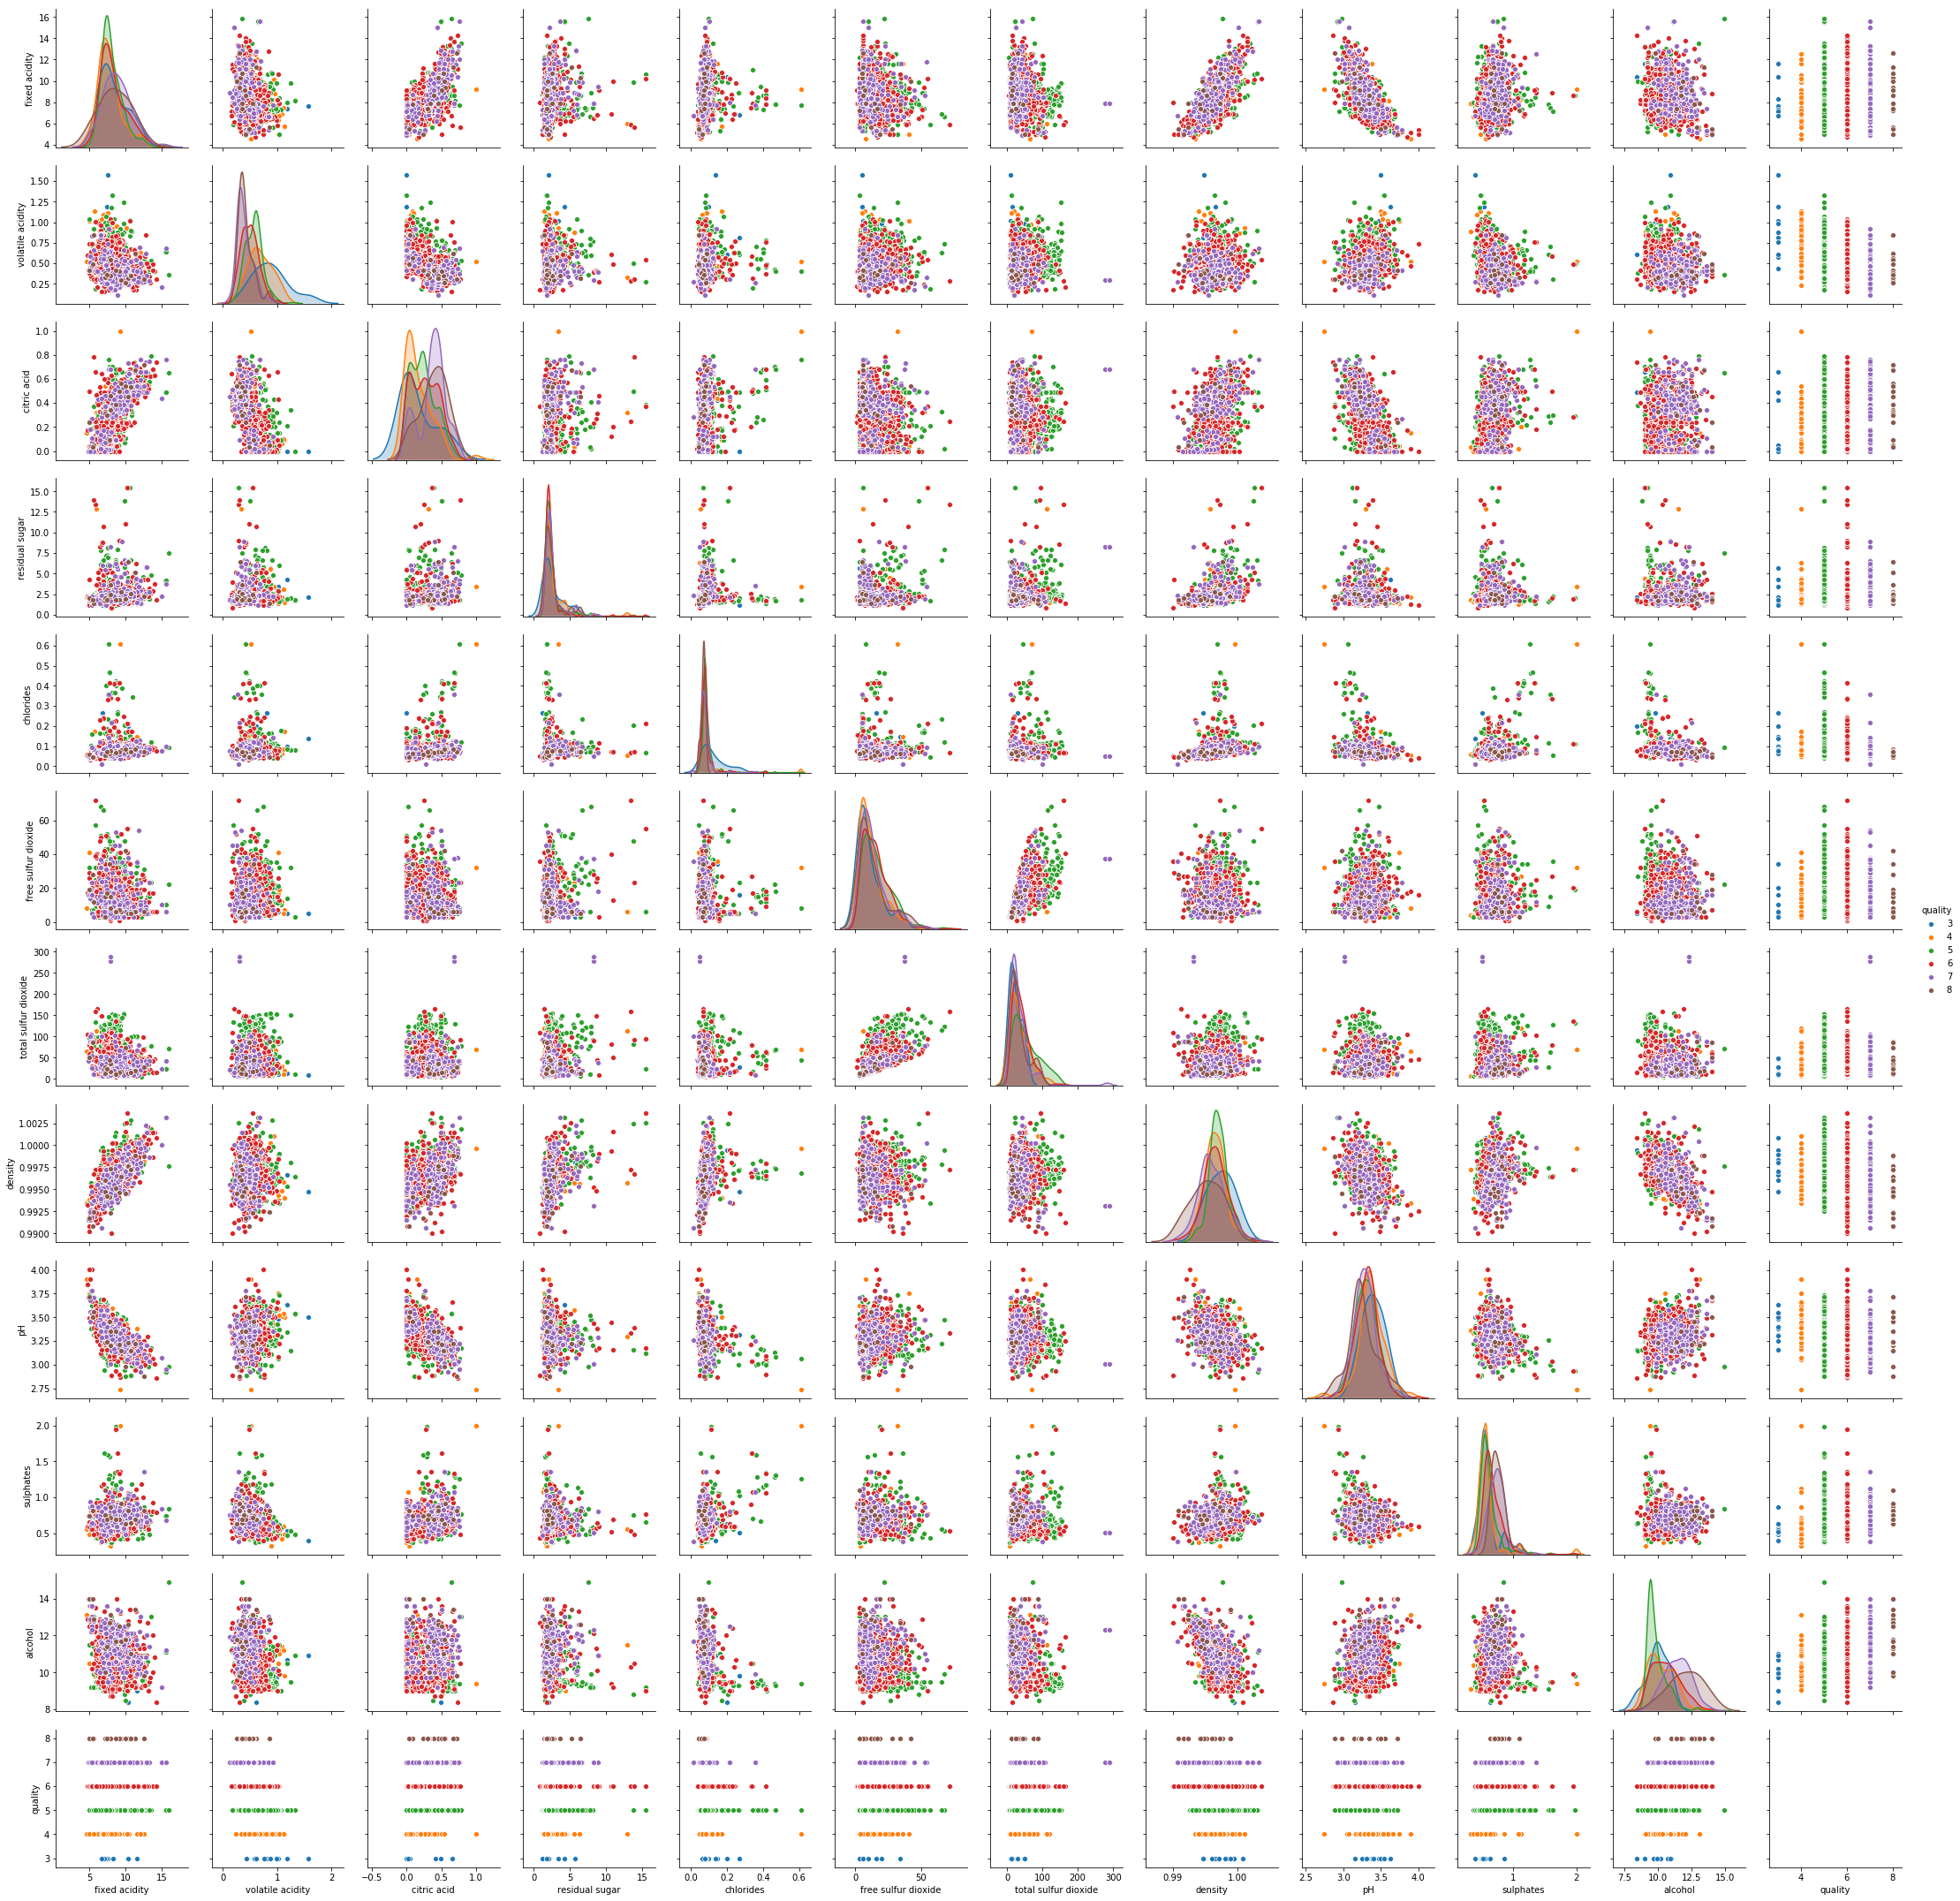

In [34]:
p = sns.pairplot(data, hue='quality')
p.savefig("redwine-pairplot.png", format='png', dpi=72)

## Data Cleaning

Remove duplicates

In [40]:
data_nodups = data[~(data.duplicated(keep = "first"))]
data_nodups.shape

(1359, 12)

Remove colinear data

In [41]:
data_nodups.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [43]:
dndnc = data_nodups.loc[:, ['volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]
dndnc.shape

(1359, 10)

In [44]:
dndnc.head()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6
5,0.66,0.00,1.8,0.075,40.0,0.9978,3.51,0.56,9.4,5


In [45]:
dndnc.groupby(by='quality').size()

quality
3     10
4     53
5    577
6    535
7    167
8     17
dtype: int64

In [46]:
dndnc.columns

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

Prepare data for SML

In [50]:
X = dndnc.loc[:,'volatile acidity':'alcohol'].values

In [48]:
Y = dndnc['quality'].values

In [51]:
Xn = preprocessing.robust_scale(X)

In [52]:
Xt, Xv, Yt, Yv = model_selection.train_test_split(Xn, Y, test_size=0.25, random_state=10)

In [57]:
nsplits = 15
kfold = model_selection.KFold(n_splits=nsplits, random_state=10)

In [58]:
scoring = 'accuracy'
error_score = np.nan

In [61]:
results = {
    'LogisticRegression' : np.zeros(nsplits),
    'LinearDiscriminantAnalysis' : np.zeros(nsplits),
    'KNeighborsClassifier' : np.zeros(nsplits),
    'DecisionTreeClassifier' : np.zeros(nsplits),
    'GaussianNB' : np.zeros(nsplits),
    'SVC' : np.zeros(nsplits),
    'RandomForestClassifier' : np.zeros(nsplits)
}

In [63]:
# Create the LogisticRegression object prepared for a multinomial outcome validation set.
alg = LogisticRegression(solver='lbfgs', multi_class="auto", max_iter=1000)

# Execute the cross-validation strategy
results['LogisticRegression'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                scoring=scoring, error_score=error_score)

# Take a look at the scores for each of the 10-fold runs.
results['LogisticRegression']

array([0.58823529, 0.52941176, 0.52941176, 0.66176471, 0.57352941,
       0.61764706, 0.61764706, 0.63235294, 0.51470588, 0.58823529,
       0.61764706, 0.60294118, 0.61764706, 0.54411765, 0.59701493])

In [64]:
# Create the LinearDiscriminantAnalysis object with defaults.
alg = LinearDiscriminantAnalysis()

# Execute the cross-validation strategy
results['LinearDiscriminantAnalysis'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                        scoring=scoring, error_score=error_score)

# Take a look at the scores for each of the 10-fold runs.
results['LinearDiscriminantAnalysis']

array([0.57352941, 0.57352941, 0.54411765, 0.64705882, 0.55882353,
       0.63235294, 0.61764706, 0.61764706, 0.5       , 0.57352941,
       0.58823529, 0.51470588, 0.61764706, 0.54411765, 0.62686567])

In [65]:
# Create the KNeighborsClassifier object with defaults.
alg = KNeighborsClassifier()

# Execute the cross-validation strategy
results['KNeighborsClassifier'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring=scoring, error_score=error_score)
# Take a look at the scores for each of the 10-fold runs.
results['KNeighborsClassifier']

array([0.54411765, 0.48529412, 0.51470588, 0.52941176, 0.48529412,
       0.48529412, 0.54411765, 0.52941176, 0.52941176, 0.60294118,
       0.57352941, 0.58823529, 0.58823529, 0.54411765, 0.55223881])

In [66]:
# Create the DecisionTreeClassifier object with defaults.
alg = DecisionTreeClassifier()

# Execute the cross-validation strategy
results['DecisionTreeClassifier'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring=scoring, error_score=error_score)
# Take a look at the scores for each of the 10-fold runs.
results['DecisionTreeClassifier']

array([0.38235294, 0.5       , 0.48529412, 0.5       , 0.54411765,
       0.58823529, 0.51470588, 0.51470588, 0.52941176, 0.52941176,
       0.5       , 0.55882353, 0.55882353, 0.36764706, 0.6119403 ])

In [67]:
# Create the GaussianNB object with defaults.
alg = GaussianNB()

# Execute the cross-validation strategy
results['GaussianNB'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring=scoring, error_score=error_score)
# Take a look at the scores for each of the 10-fold runs.
results['GaussianNB']

array([0.51470588, 0.52941176, 0.5       , 0.55882353, 0.55882353,
       0.63235294, 0.57352941, 0.54411765, 0.51470588, 0.57352941,
       0.60294118, 0.51470588, 0.64705882, 0.54411765, 0.59701493])

In [68]:
# Create the SVC object with defaults.
alg = SVC(gamma='auto')

# Execute the cross-validation strategy
results['SVC'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring=scoring, error_score=error_score)
# Take a look at the scores for each of the 10-fold runs.
results['SVC']

array([0.58823529, 0.54411765, 0.57352941, 0.70588235, 0.51470588,
       0.61764706, 0.58823529, 0.60294118, 0.52941176, 0.66176471,
       0.58823529, 0.67647059, 0.64705882, 0.58823529, 0.58208955])

In [76]:
# Create the SVC object with defaults.
alg = RandomForestClassifier(n_estimators=100, random_state=12)

# Execute the cross-validation strategy
results['RandomForestClassifier'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                    scoring=scoring, error_score=error_score)
# Take a look at the scores for each of the 10-fold runs.
results['RandomForestClassifier']

array([0.55882353, 0.61764706, 0.58823529, 0.72058824, 0.54411765,
       0.61764706, 0.54411765, 0.64705882, 0.55882353, 0.70588235,
       0.58823529, 0.60294118, 0.70588235, 0.51470588, 0.58208955])

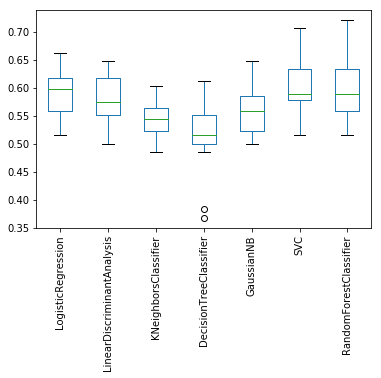

In [77]:
pd.DataFrame(results).plot(kind="box", rot=90);

In [78]:
# Create the RandomForestClassifier object with defaults.
alg = RandomForestClassifier(n_estimators=100, random_state=12)

# Create a new model using all of the training data.
alg.fit(Xt, Yt)

# Using the testing data, predict the iris species.
predictions = alg.predict(Xv)

# Let's see the predictions
predictions

array([6, 5, 6, 5, 5, 5, 6, 6, 5, 7, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 5, 7, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 5, 6, 7, 5, 6, 6,
       5, 5, 6, 5, 5, 5, 6, 6, 4, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 7,
       5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 3, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5,
       5, 5, 7, 5, 5, 5, 5, 7, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6,
       6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 7, 7, 5, 5, 5, 6, 6, 7,
       6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5,
       5, 6, 6, 7, 5, 6, 5, 5, 6, 5, 6, 6, 6, 7, 6, 6, 6, 7, 6, 6, 5, 5,
       5, 6, 6, 7, 5, 6, 6, 6, 7, 6, 6, 6, 7, 6, 6, 5, 6, 7, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 7, 5, 6,

In [79]:
accuracy_score(Yv, predictions)

0.5764705882352941

In [87]:
labels = dndnc['quality'].sort_values().unique()
labels

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [88]:
cm = confusion_matrix(Yv, predictions, labels=labels)
print(cm)

[[  0   0   2   0   0   0]
 [  1   0  15   3   0   0]
 [  0   0 108  37   0   0]
 [  0   1  42  76  10   0]
 [  0   0   3  26  12   0]
 [  0   0   0   4   0   0]]


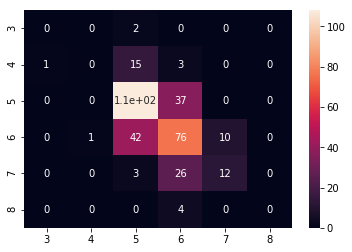

In [89]:
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels);

In [90]:
cr = classification_report(Yv, predictions)
print(cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.64      0.74      0.69       145
           6       0.52      0.59      0.55       129
           7       0.55      0.29      0.38        41
           8       0.00      0.00      0.00         4

   micro avg       0.58      0.58      0.58       340
   macro avg       0.28      0.27      0.27       340
weighted avg       0.53      0.58      0.55       340



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
